In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [68]:
import lightgbm as lgbm

In [2]:
df = pd.read_csv('df_bp3.csv')

C:\Users\sanch\AppData\Local\Temp\ipykernel_10188\1801930758.py:1: DtypeWarning: Columns (13,14,15,85,87,198) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_bp3.csv')


In [3]:
df.info(max_cols=600)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 199 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    date                  67352 non-null  int64  
 1    dblheader_code        67352 non-null  int64  
 2    day_of_week           67352 non-null  object 
 3    team_v                67352 non-null  object 
 4    league_v              67352 non-null  object 
 5    game_no_v             67352 non-null  int64  
 6    team_h                67352 non-null  object 
 7    league_h              67352 non-null  object 
 8    game_no_h             67352 non-null  int64  
 9    runs_v                67352 non-null  int64  
 10   runs_h                67352 non-null  int64  
 11   outs_total            67352 non-null  int64  
 12   day_night             67352 non-null  object 
 13   completion_info       52 non-null     object 
 14   forfeit_info          1 non-null      object 
 15   

In [4]:
pd.crosstab(df.implied_prob_h>0, df.season)

season,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
implied_prob_h,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1600,2017,2267,2266,2432,2428,2429,2429,2426,2430,2428,2431,2429,2431,2428,2430,2430,2429,2430,2431,2430,2429,2428,2430,2431,0,0,0,0
True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2429,898,2426,2430


In [5]:
df_odds = df[df.season>=2019]

In [6]:
df_odds

,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,runs_h,outs_total,day_night,completion_info,forfeit_info,protest_info,ballpark_id,attendance,game_minutes,linescore_v,linescore_h,AB_v,H_v,2B_v,3B_v,HR_v,RBI_v,SH_v,SF_v,HBP_v,BB_v,IBB_v,SO_v,SB_v,CS_v,GIDP_v,CI_v,LOB_v,P_num_v,ERind_v,ERteam_v,WP_v,balk_v,PO_v,ASST_v,ERR_v,PB_v,DP_v,TP_v,AB_h,H_h,2B_h,3B_h,HR_h,RBI_h,SH_h,SF_h,HBP_h,BB_h,IBB_h,SO_h,SB_h,CS_h,GIDP_h,CI_h,LOB_h,P_num_h,ERind_h,ERteam_h,WP_h,balk_h,PO_h,ASST_h,ERR_h,PB_h,DP_h,TP_h,ump_HB_id,ump_HB_name,ump_1B_id,ump_1B_name,ump_2B_id,ump_2B_name,ump_3B_id,ump_3B_name,ump_LF_id,ump_LF_name,ump_RF_id,ump_RF_name,mgr_id_v,mgr_name_v,mgr_id_h,mgr_name_h,pitcher_id_w,pitcher_name_w,pitcher_id_l,pitcher_name_l,pitcher_id_s,pitcher_name_s,GWRBI_id,GWRBI_name,pitcher_start_id_v,pitcher_start_name_v,pitcher_start_id_h,pitcher_start_name_h,batter1_name_v,batter1_id_v,batter1_pos_v,batter2_name_v,batter2_id_v,batter2_pos_v,batter3_name_v,batter3_id_v,batter3_pos_v,batter4_name_v,batter4_id_v,batter4_pos_v,batter5_name_v,batter5_id_v,batter5_pos_v,batter6_name_v,batter6_id_v,batter6_pos_v,batter7_name_v,batter7_id_v,batter7_pos_v,batter8_name_v,batter8_id_v,batter8_pos_v,batter9_name_v,batter9_id_v,batter9_pos_v,batter1_name_h,batter1_id_h,batter1_pos_h,batter2_name_h,batter2_id_h,batter2_pos_h,batter3_name_h,batter3_id_h,batter3_pos_h,batter4_name_h,batter4_id_h,batter4_pos_h,batter5_name_h,batter5_id_h,batter5_pos_h,batter6_name_h,batter6_id_h,batter6_pos_h,batter7_name_h,batter7_id_h,batter7_pos_h,batter8_name_h,batter8_id_h,batter8_pos_h,batter9_name_h,batter9_id_h,batter9_pos_h,misc_info,acqui_info,season,run_diff,home_victory,run_total,date_dblhead,BATAVG_162_h,BATAVG_162_v,OBP_162_h,OBP_162_v,SLG_162_h,SLG_162_v,OBS_162_h,OBS_162_v,SB_162_h,SB_162_v,CS_162_h,CS_162_v,ERR_162_h,ERR_162_v,BATAVG_30_h,BATAVG_30_v,OBP_30_h,OBP_30_v,SLG_30_h,SLG_30_v,OBS_30_h,OBS_30_v,SB_30_h,SB_30_v,CS_30_h,CS_30_v,ERR_30_h,ERR_30_v,implied_prob_h,implied_prob_v,implied_prob_h_mid,over_under_line,over_under_result
59169,20190320,0,Wed,SEA,AL,1,OAK,AL,1,9,7,54,N,NaN,NaN,NaN,TOK01,45787.0,204,005130000,112000300,31,7,1,0,2,9,1,1,2,6,0,10,2,1,0,0,5,5,6,6,1,0,27,11,1,0,2,0,35,9,3,0,3,7,0,0,0,3,0,8,0,0,2,0,4,7,9,9,2,0,27,4,0,0,0,0,nelsj901,Jeff Nelson,gibsh902,Tripp Gibson,barkl901,Lance Barksdale,muchm901,Mike Muchlinski,NaN,(none),NaN,(none),servs002,Scott Servais,melvb001,Bob Melvin,gonzm005,Marco Gonzales,fierm001,Michael Fiers,strih001,Hunter Strickland,santd002,Domingo Santana,gonzm005,Marco Gonzales,fierm001,Michael Fiers,gordd002,Dee Gordon,4,hanim001,Mitch Haniger,8,brucj001,Jay Bruce,3,encae001,Edwin Encarnacion,10,santd002,Domingo Santana,7,narvo001,Omar Narvaez,2,healr001,Ryon Healy,5,beckt001,Tim Beckham,6,suzui001,Ichiro Suzuki,9,laurr001,Ramon Laureano,8,chapm001,Matt Chapman,5,piscs001,Stephen Piscotty,9,davik003,Khris Davis,10,pindc001,Chad Pinder,7,olsom001,Matt Olson,3,profj001,Jurickson Profar,4,semim001,Marcus Semien,6,hundn001,Nick Hundley,2,NaN,Y,2019,-2,0,16,201903200,0.252196,0.254308,0.319302,0.308262,0.439147,0.408126,0.758448,0.716388,35.0,79.0,21.0,37.0,88.0,88.0,0.256836,0.248031,0.336530,0.312950,0.444336,0.399606,0.780866,0.712556,5.0,10.0,2.0,5.0,13.0,19.0,0.600000,0.416667,0.591667,9.0,O
59170,20190321,0,Thu,SEA,AL,2,OAK,AL,2,5,4,72,N,NaN,NaN,NaN,TOK01,46451.0,267,021000100001,000020200000,43,9,4,0,2,5,0,1,2,5,0,9,1,0,1,0,10,7,3,3,2,0,36,12,1,0,1,0,46,10,1,0,0,3,0,0,0,6,0,10,0,0,1,0,12,8,5,5,0,1,36,8,0,0,1,0,welkb901,Bill Welke,barkl901,Lance Barksdale,muchm901,Mike Muchlinski,nelsj901,Jeff Nelson,NaN,(none),NaN,(none),servs002,Scott Servais,melvb001,Bob Melvin,rossz001,Zac Rosscup,buchr001,Ryan Buchter,strih001,Hunter Strickland,santd002,Domingo Santana,kikuy001,Yusei Kikuchi,estrm001,Marco Estrada,gordd002,Dee Gordon,4,hanim001,Mitch Haniger,8,brucj001,Jay Bruce,3,encae001,Edwin Encarnacion,10,santd002,Domingo Santana,7,narvo001,Omar Narvaez,2,beckt001,Tim Beckham,6,

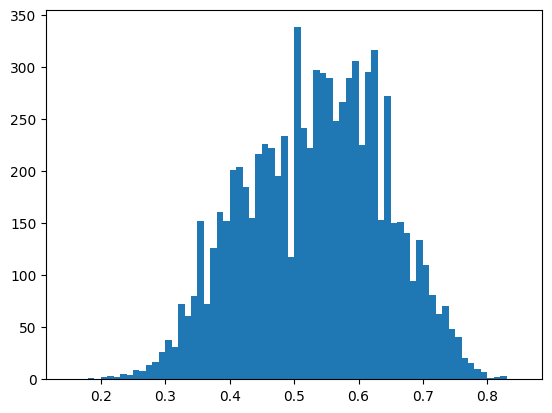

In [7]:
plt.hist(df_odds.implied_prob_h_mid, bins=np.linspace(.15,.85,71));

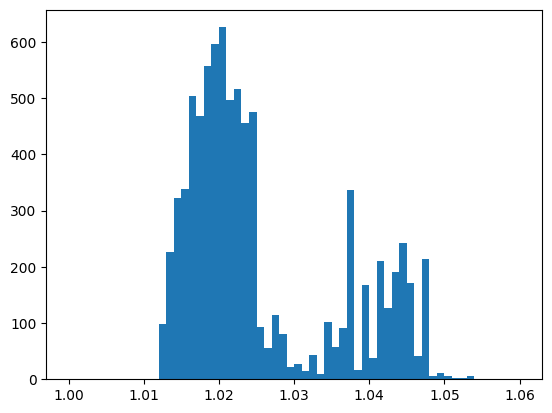

In [8]:
plt.hist(df_odds.implied_prob_h + df_odds.implied_prob_v, bins=np.linspace(1,1.06,61));

## Modelaje

In [24]:
df[['OBP_162_h','OBP_162_v', 'SLG_162_h','SLG_162_v']].isna().sum()

OBP_162_h    2674
OBP_162_v    2670
SLG_162_h    2674
SLG_162_v    2670
dtype: int64

In [25]:
df = df.dropna(subset=['OBP_162_h', 'OBP_162_v', 'SLG_162_h', 'SLG_162_v'])

In [26]:
df.isna().sum()

date                        0
dblheader_code              0
day_of_week                 0
team_v                      0
league_v                    0
game_no_v                   0
team_h                      0
league_h                    0
game_no_h                   0
runs_v                      0
runs_h                      0
outs_total                  0
day_night                   0
completion_info         64204
forfeit_info            64250
protest_info            64225
ballpark_id                 0
attendance                900
game_minutes                0
linescore_v                 0
linescore_h                 0
AB_v                        0
H_v                         0
2B_v                        0
3B_v                        0
HR_v                        0
RBI_v                       0
SH_v                        0
SF_v                        0
HBP_v                       0
BB_v                        0
IBB_v                       0
SO_v                        0
SB_v      

In [28]:
df_train = df[(df.season>1995) & (df.season<=2020)]
df_test = df[df.season>=2021]

In [53]:
X = ['OBP_162_h','OBP_162_v',
            'SLG_162_h','SLG_162_v', 
             'OBP_30_h','OBP_30_v', 'implied_prob_h'
            # 'SLG_30_h','SLG_30_v',
            # 'game_no_h',
           ]
target = 'home_victory'

In [54]:
X_train = df_train.loc[:,X]
X_test = df_test.loc[:,X]

y_train = df_train[target].to_numpy()
y_test = df_test[target].to_numpy()

In [55]:
y_train.shape, y_test.shape

((58059,), (4856,))

In [56]:
X_train.shape, X_test.shape

((58059, 7), (4856, 7))

In [57]:
X_train.isna().sum()

OBP_162_h         0
OBP_162_v         0
SLG_162_h         0
SLG_162_v         0
OBP_30_h          0
OBP_30_v          0
implied_prob_h    0
dtype: int64

In [58]:
smote = SMOTE()

In [59]:
X_train_sm, y_train_sm = smote.fit_resample(X_train.to_numpy(), y_train)

In [60]:
forest = RandomForestClassifier()


In [61]:
forest.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [62]:
forest.score(X_train_sm,y_train_sm)

1.0

In [63]:
forest.score(X_test.to_numpy(),y_test)

0.5556013179571664

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5531301482701813


In [67]:
X_train

,OBP_162_h,OBP_162_v,SLG_162_h,SLG_162_v,OBP_30_h,OBP_30_v,implied_prob_h
3617,0.344522,0.354798,0.445992,0.427155,0.349164,0.324468,0.000000
3618,0.340198,0.328686,0.414565,0.409307,0.357627,0.274930,0.000000
3619,0.335943,0.328512,0.413918,0.410727,0.335088,0.299567,0.000000
3620,0.335249,0.351174,0.407885,0.448943,0.333333,0.342014,0.000000
3621,0.323960,0.321014,0.412947,0.410689,0.311712,0.333929,0.000000
...,...,...,...,...,...,...,...
62491,0.337058,0.298240,0.491702,0.385835,0.341873,0.315146,0.642857
62492,0.318621,0.305780,0.435693,0.395608,0.305447,0.307839,0.555556
62493,0.316273,0.320702,0.427745,0.437876,0.309372,0.337976,0.434783
62494,0.295736,0.335695,0.397744,0.468001,0.272287,0.293087,0.465116
